# **Recurrent Neural Networks - 실습**

[#](https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html)

In [1]:
# urllib.request module의 urlretrieve 함수로부터 zip file 다운로드 

from urllib.request import urlretrieve
import zipfile

urlretrieve("https://download.pytorch.org/tutorial/data.zip", "data.zip")
# 해당 url로부터 zip file을 다운로드하고, 현 working directory에 저장 

with zipfile.ZipFile("data.zip", 'r') as f:
    f.extractall(".")
    # zipfile.ZipFile context manager를 통해 "data.zip" file을 read mode로 연다 
    # zip file의 컨텐츠를 모두 추출한다


In [2]:
# language classification task 
# 이름을 각기 다른 언어로 카테고라이징하기 

from __future__ import unicode_literals, print_function, division
from io import open   # 특정한 언어로 파일을 읽고, 쓸 수 있도록함
import glob   # 특정한 패턴에 맞는 파일 이름의 리스트를 반환함 
import os   # 운영체제 의존적인 기능을 사용할 수 있도록 함 (ex. 파일 읽기 정보)

def findFiles(path): return glob.glob(path)
# 경로의 패턴을 input으로 받아서, 패턴에 맞는 파일 이름을 리스트로 반환함 

print(findFiles('data/names/*.txt'))
# data/names/*.txt 패턴에 맞는 파일 이름의 리스트를 출력함 
# data/names 디렉토리 안에 있는 모든 .txt 파일을 찾음 

import unicodedata
import string
# Unicode character, string으로 작업할 수 있도록 함 

all_letters = string.ascii_letters + " .,;'"    # 소문자 대문자 ascii letter와 몇몇 문장 부호를 포함한 all_letters 변수 선언 
n_letters = len(all_letters)   # all_letters string에 있는 모든 글자의 개수 


# 유니코드 문자열을 ASCII로 변환, https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )
# NFD normalization 이용하여 unicode string 's'를 base form으로 normalize 
# diacritic marks ('Mn') 필터 아웃 


print(unicodeToAscii('Ślusàrski'))
# Unicode string 'Ślusàrski'로 테스트하여 Ascii character로 변환한 문자 출력 

# 각 언어의 이름 목록인 category_lines 사전 생성
category_lines = {}   # 언어 카테고리와 해당 이름들의 정보를 저장 
all_categories = []   

# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]     # 파일을 읽고, ascii character로 변환

for filename in findFiles('data/names/*.txt'):   # .txt 파일 확장자의 모든 파일을 읽고 각 파일을 for loop으로 넘겨줌 
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)      # 전체 언어 카테고리의 개수 출력 

['data/names/English.txt', 'data/names/Japanese.txt', 'data/names/Scottish.txt', 'data/names/Greek.txt', 'data/names/Dutch.txt', 'data/names/German.txt', 'data/names/Vietnamese.txt', 'data/names/Portuguese.txt', 'data/names/Arabic.txt', 'data/names/French.txt', 'data/names/Czech.txt', 'data/names/Spanish.txt', 'data/names/Polish.txt', 'data/names/Russian.txt', 'data/names/Korean.txt', 'data/names/Irish.txt', 'data/names/Italian.txt', 'data/names/Chinese.txt']
Slusarski


In [3]:
print(category_lines['Italian'][:5])
# 이탈리아 언어 카테고리의 처음 다섯번째 단어 출력 

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [4]:
'''
.. NOTE::
역자 주:  One-Hot 벡터는 언어를 다룰 때 자주 이용되며,
단어, 글자 등을 벡터로 표현할 때 단어, 글자 사이의 상관 관계를 미리 알 수 없을 경우,
One-Hot으로 표현하여 서로 직교한다고 가정하고 학습을 시작합니다.
이와 동일하게, 상관 관계를 알 수 없는 다른 데이터의 경우에도 One-Hot 벡터를 활용할 수 있습니다.
'''

'''
Function 
1. letterToIndex() : 특정 문자의 주소 찾기 
2. letterToTensor() : 특정 문자를 원-핫 인코딩
3. lineToTensor() : 특정 이름을 원-핫 인코딩 
'''

import torch

# all_letters 로 문자의 주소 찾기, 예시 "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# 검증을 위해서 한 개의 문자를 <1 x n_letters> Tensor로 변환
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 한 줄(이름)을  <line_length x 1 x n_letters>,
# 또는 One-Hot 문자 벡터의 Array로 변경
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [6]:
import torch.nn as nn

class RNN(nn.Module):
    # 모든 pytorch 모델의 기본 클래스 nn.Module 상속 
    
    def __init__(self, input_size, hidden_size, output_size):
        # 생성자가 RNN의 아키텍쳐를 초기화함 
        '''
        - input_size : n_letters / one-hot encoded tensor의 feature 개수 
        - hidden_size : RNN 은닉 상태의 개수 
        - output_size : n_categories / 언어 카테고리의 개수 
        '''
        
        super(RNN, self).__init__()   # 상속 시 부모 클래스의 생성자 호출함 

        self.hidden_size = hidden_size   # 은닉 상태의 크기를 RNN 객체의 속성으로 저장함 

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)   # fully connected linear layer, next hidden state의 input = input_size + hidden_size
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)   # dim=1에 softmax 활성함수 적용 

    def forward(self, input, hidden):   # RNN의 forward pass, input tensor와 hidden state tensor를 input으로 받아서 output tensor와 updated hidden state tensor 반환
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)   # unnormalized score에 대해 softmax 활성함수를 씌워서 language category에 따른 확률 계산 
        return output, hidden

    def initHidden(self):   # 초기 hidden_state를 initialize 
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [7]:
input = letterToTensor('A')   # <1 x n_letters> # all_letters string의 character 개수 
hidden = torch.zeros(1, n_hidden)   # <1 x n_hidden> # RNN hidden unit의 개수 

output, next_hidden = rnn(input, hidden)   # output : 각 언어 카테고리의 확률 # next_hidden : input A를 processing 하고 난 이후의 next hidden state 

In [8]:
input = lineToTensor('Albert')   #  'Albert'를 one-hot encoded tensor로 변환 
hidden = torch.zeros(1, n_hidden)   # <1 x n_hidden> size의 텐서로 변환 

output, next_hidden = rnn(input[0], hidden)
print(output)
# output은 각 언어 카테고리에 대한 확률
# next_hidden은 첫번째 글자 A를 처리한 이후 update된 hidden state 

tensor([[-3.0231, -2.8779, -2.8937, -2.9502, -2.9624, -2.9339, -2.8868, -2.9232,
         -2.8083, -2.8848, -2.7663, -2.9114, -2.8621, -2.8222, -2.8736, -2.8668,
         -2.8775, -2.9327]], grad_fn=<LogSoftmaxBackward0>)


In [9]:
def categoryFromOutput(output):
    # output 텐서, 즉 각 언어 카테고리의 확률을 input으로 받음 
    top_n, top_i = output.topk(1)  # 텐서의 가장 큰 값(k=1) 및 주소(인덱스)
    category_i = top_i[0].item()   # 텐서에서 정수 값으로 변경 (top_i 텐서로부터 가장 높은 확률의 언어 카테고리 인덱스를 얻고, 스칼라 텐서를 파이썬 integer로 변환)
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Czech', 10)


In [10]:
import random

def randomChoice(l):
    # 데이터셋으로부터 트레이닝 예제를 랜덤하게 샘플링한다
    # 리스트 l로부터 랜덤한 element를 반환함 
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    # 데이터셋으로부터 랜덤하게 학습 데이터를 추출함 
    category = randomChoice(all_categories)
    # 랜덤한 언어 카테고리 선택함 
    line = randomChoice(category_lines[category])
    # 선택된 언어 카테고리에서 랜덤하게 언어 line(name) 선택 
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    # all_category list에는 카테고리에 대한 인덱스가 있는 텐서를 카테고리 string으로 변환
    line_tensor = lineToTensor(line)
    # 랜덤하게 선택된 line(name)을 원-핫 인코딩한 텐서로 변환함 
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Czech / line = Voneve
category = Korean / line = Han
category = Czech / line = Demall
category = German / line = Straub
category = Polish / line = Nosek
category = Vietnamese / line = Diep
category = Spanish / line = Felix
category = Portuguese / line = Garcia
category = Japanese / line = Narato
category = Italian / line = Vacca


In [11]:
# Negative Log Likelihood (NLL) loss criterion
# 다중분류문제 

criterion = nn.NLLLoss()
'''
- nn :  PyTorch neural network module (torch.nn)
- NLLLoss : 다중분류문제의 손실함수 (NLLLoss = -log(P(target)))
'''

In [12]:
learning_rate = 0.005  # 학습률을 너무 높게 설정하면 발산할 수 있고, 너무 낮으면 학습이 되지 않을 수 있습니다.

# RNN 기반의 언어 분류 모델 

def train(category_tensor, line_tensor):
    '''
    input 
    - category_tensor : 원-핫 인코딩된 ground truth (target label)
    - line_tensor : 원-핫 인코딩된 input tensor 
    '''
    
    hidden = rnn.initHidden()   # rnn 모델의 initHidden 메소드를 통해 RNN의 은닉상태를 0으로 초기화함 

    rnn.zero_grad()   # 처음 모델 파라미터를 초기화함 

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)   # NLL loss로 loss 계산 
    loss.backward()   # 해당 loss에서 모델 파라미터의 gradient 계산 

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

# 매번 다른 학습 데이터가 호출될 것임 

In [13]:
import time
import math

n_iters = 100000    # 학습 Iteration의 총 횟수 
print_every = 5000  # 5000 iteration 마다 training의 progress를 출력함 
plot_every = 1000   # 1000 iteration 마다 평균 loss를 저장함 

# train 함수를 이용하여 모델 파라미터를 업데이트함 

# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []     # 지금까지 축적된 Loss를 축적하여 저장

def timeSince(since):   # time stamp를 이용하여 지금까지 소요된 시간을 계산함 
    now = time.time()   # 학습의 시작 시간
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()  # 각 Iteration마다 랜덤하게 선택된 학습데이터 사용
    output, loss = train(category_tensor, line_tensor)  # 모델 파라미터를 업데이트하고, 각 언어 카테고리의 발생 확률을 Output에 저장하고, 현재 학습데이터에 대한 loss를 저장함 
    current_loss += loss

    # ``iter`` 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 4s) 2.7723 Teoh / Korean ✗ (Chinese)
10000 10% (0m 8s) 1.9437 Bartolomeo / Polish ✗ (Italian)
15000 15% (0m 12s) 1.9187 Wendel / German ✓
20000 20% (0m 16s) 2.1911 Quraishi / Polish ✗ (Arabic)
25000 25% (0m 20s) 1.7219 Piatek / Polish ✓
30000 30% (0m 24s) 4.1347 Oorschot / Scottish ✗ (Dutch)
35000 35% (0m 28s) 1.1493 Sook / Korean ✓
40000 40% (0m 32s) 0.4684 Naomhan / Irish ✓
45000 45% (0m 36s) 0.2577 Quraishi / Arabic ✓
50000 50% (0m 40s) 5.0142 Alexandropoulos / Portuguese ✗ (Greek)
55000 55% (0m 44s) 0.1698 Bertsimas / Greek ✓
60000 60% (0m 48s) 2.4923 Khoo / Korean ✗ (Chinese)
65000 65% (0m 52s) 2.5026 Tobias / Greek ✗ (French)
70000 70% (0m 56s) 0.5748 Manos / Greek ✓
75000 75% (1m 0s) 0.5834 Vlahos / Greek ✓
80000 80% (1m 4s) 2.4698 Albuquerque / French ✗ (Portuguese)
85000 85% (1m 8s) 0.8255 Giang / Vietnamese ✓
90000 90% (1m 12s) 2.4740 Machado / Japanese ✗ (Spanish)
95000 95% (1m 16s) 0.3988 Mathghamhain / Irish ✓
100000 100% (1m 20s) 0.1579 Slaski / Polish ✓


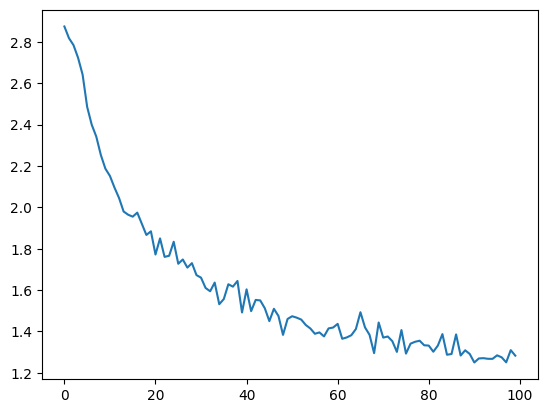

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 손실함수를 그려서 학습 과정을 시각화함 

plt.figure()
plt.plot(all_losses)
plt.xlabel('Plot Every (Iterations)')
plt.ylabel('Average Loss')
plt.title('Training Progress: Average Loss vs. Iterations')
plt.grid(True)
plt.show()

<ipython-input-15-6bf7967722dc>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-15-6bf7967722dc>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


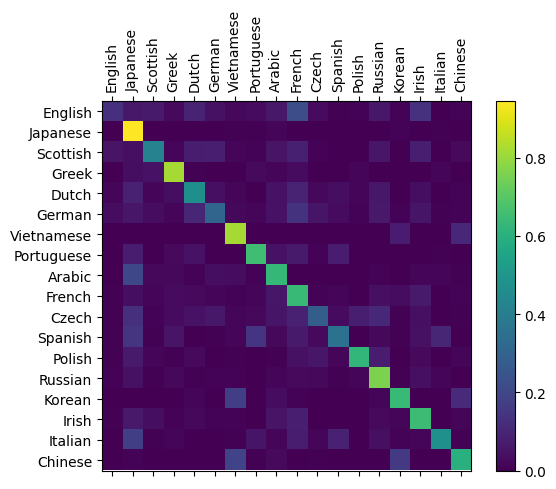

In [15]:
# 혼란 행렬에서 정확한 추측을 추적 
# 언어 분류의 정확도를 시각화 
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000     # 데이터셋으로부터 10,000개의 학습데이터를 랜덤하게 추출함 

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    '''
    input : 원-핫 인코딩된 line_tensor 
    '''
    
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 예시 중 어떤 것이 정확히 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output) # 예측한 언어 카테고리와 인덱스 
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1 # true category와 predicted category가 혼동행렬의 input으로 들어감 

# 모든 행을 합계로 나누어 정규화
# 정규화를 통해 분류 정확도 알 수 있음 
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()          # plot의 figure 설정
ax = fig.add_subplot(111)   # plot의 axis 설정 
cax = ax.matshow(confusion.numpy()) # heatmap으로 confusion matrix plot
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [16]:
def predict(input_line, n_predictions=3):
    '''
    input : input name 
    output : 확률에 따른 top N 예측 
    '''
    
    print('\n> %s' % input_line)    # input name 출력 
    with torch.no_grad():           # 예측하는 동안 gradient computation X 
        output = evaluate(lineToTensor(input_line))     # gradient function 이용하여 input_name에 대한 output probability 얻음 

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        # topv : top N probability value를 포함하는 텐서 
        # topi : 해당 Index 포함 텐서 
        predictions = []
        # 빈 리스트 만듦 

        for i in range(n_predictions):
            # top N prediction iterate 
            value = topv[0][i].item()   # topv 텐서로부터 i번째 예측에 대한 값 저장 
            category_index = topi[0][i].item()  # topi 텐서로부터 예측된 언어 카테고리의 인덱스 저장 
            print('(%.2f) %s' % (value, all_categories[category_index]))    # 확률과 해당 언어 카테고리 출력 
            predictions.append([value, all_categories[category_index]])     # predictions list에 append 

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.50) Russian
(-1.16) Czech
(-3.55) Irish

> Jackson
(-0.87) Scottish
(-1.07) English
(-2.18) Russian

> Satoshi
(-0.22) Japanese
(-2.26) Arabic
(-3.11) Italian
